In [1]:
from metar.Metar import Metar
from metar.CycleData import CycleData
import pandas as pd
import geopandas as gpd
import shapely.geometry as geom
import geodatasets
import numpy as np
import folium
import mapclassify
import matplotlib.pyplot as plt


In [2]:
# basic Metar object
# https://tgftp.nws.noaa.gov/data/observations/metar/stations/BGFU.TXT
metar_str = "2019/01/19 03:00 BGFU 190300Z 05008KT 9999 SCT018TCU 32/25 Q1005"
metar_decoded = Metar(metar_str, strict = False)
print(metar_decoded)

station: BGFU
type: routine report, cycle 3 (automatic report)
time: Mon Feb 19 03:00:00 2024
temperature: 32.0 °C
dew point: 25.0 °C
wind: NE at 8 kt
pressure: 1005.00 mbar
sky: scattered towering cumulus at 1800.0 ft
METAR: 2019/01/19 03:00 BGFU 190300Z 05008KT 9999 SCT018TCU 32/25 Q1005


In [3]:
# now introduce the cycle data
end_time = pd.Timestamp.now(tz='UTC')
start_time = end_time - pd.Timedelta('24 hours')
cycle_data = await CycleData.create_instance(start_time, end_time, tz='UTC')

Fetching cycles 23 to 0...
Cycle data has been fetched!
Processing 890982 METAR reports...
Data has been processed!


In [4]:
# can print the cycle data
print(cycle_data)

Weather Data from 2024-03-05 23:31:43.029237+00:00 to 2024-03-06 23:31:43.029237+00:00 in UTC timezone.
Data points: 222159, Columns: ['code', 'type', 'correction', 'mod', 'station_id', 'time', 'cycle', 'wind_dir', 'wind_speed', 'wind_gust', 'wind_dir_from', 'wind_dir_to', 'vis', 'vis_dir', 'max_vis', 'max_vis_dir', 'temp', 'dewpt', 'press', 'runway', 'weather', 'recent', 'sky', 'windshear', 'wind_speed_peak', 'wind_dir_peak', 'peak_wind_time', 'wind_shift_time', 'max_temp_6hr', 'min_temp_6hr', 'max_temp_24hr', 'min_temp_24hr', 'press_sea_level', 'precip_1hr', 'precip_3hr', 'precip_6hr', 'precip_24hr', 'snowdepth', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', '_trend', '_trend_groups', '_remarks', '_unparsed_groups', '_unparsed_remarks', '_now', '_month', '_year', '_day', '_hour', '_min', 'geometry']


In [5]:
# can also show in jupyter
cycle_data

AllCyclesData(dataframe=                                                     code   type correction  \
0       KACZ 052345Z AUTO 13005KT 10SM CLR 18/13 A3005...  METAR       None   
1       KCBE 052345Z AUTO 00000KT 10SM BKN019 BKN100 1...  METAR       None   
2       KCGE 052345Z AUTO 00000KT 10SM OVC015 11/11 A3...  METAR       None   
3       KCTZ 052345Z AUTO 00000KT 10SM CLR 19/14 A3004...  METAR       None   
4       KDMW 052345Z AUTO 00000KT 10SM OVC012 12/09 A3...  METAR       None   
...                                                   ...    ...        ...   
222154    VOML 062330Z 06004KT 6000 NSC 23/20 Q1011 NOSIG  METAR       None   
222155  OPMT 062330Z 36004KT 4000 FU FEW100 13/09 Q101...  METAR       None   
222156  VECC 062330Z 36006KT 2800 HZ NSC 21/18 Q1011 N...  METAR       None   
222157  SMJP 062330Z 08008KT 8000 -SHRA FEW005 FEW015C...  METAR       None   
222158  TFFJ 062330Z AUTO 09008KT 050V130 9999 BKN025 ...  METAR       None   

         mod station_id    

In [6]:
# can access the dataframe
cycle_data_df = cycle_data.dataframe
cycle_data_df.head()

,code,type,correction,mod,station_id,time,cycle,wind_dir,wind_speed,wind_gust,...,_remarks,_unparsed_groups,_unparsed_remarks,_now,_month,_year,_day,_hour,_min,geometry
0,KACZ 052345Z AUTO 13005KT 10SM CLR 18/13 A3005...,METAR,None,AUTO,KACZ,2024-03-05 23:45:00+00:00,24.0,130.0 degree,5.0,nan,...,[Automated station (type 2)],[],[],2024-03-06 23:31:51.175388+00:00,3.0,2024.0,5.0,23.0,45.0,POINT (-78.00500 34.71800)
1,KCBE 052345Z AUTO 00000KT 10SM BKN019 BKN100 1...,METAR,None,AUTO,KCBE,2024-03-05 23:45:00+00:00,24.0,0.0 degree,0.0,nan,...,[Automated station (type 2)],[],[],2024-03-06 23:31:51.177895+00:00,3.0,2024.0,5.0,23.0,45.0,POINT (-78.75980 39.61820)
2,KCGE 052345Z AUTO 00000KT 10SM OVC015 11/11 A3...,METAR,None,AUTO,KCGE,2024-03-05 23:45:00+00:00,24.0,0.0 degree,0.0,nan,...,[],[],[A01],2024-03-06 23:31:51.178644+00:00,3.0,2024.0,5.0,23.0,45.0,POINT (-76.03090 38.53720)
3,KCTZ 052345Z AUTO 00000KT 10SM CLR 19/14 A3004...,METAR,None,AUTO,KCTZ,2024-03-05 23:45:00+00:00,24.0,0.0 degree,0.0,nan,...,[Automated station (type 2)],[],[],2024-03-06 23:31:51.182217+00:00,3.0,2024.0,5.0,23.0,45.0,POINT (-78.36270 34.97520)
4,KDMW 052345Z AUTO 00000KT 10SM OVC012 12/09 A3...,METAR,None,AUTO,KDMW,2024-03-05 23:45:00+00:00,24.0,0.0 degree,0.0,nan,...,[Automated station (type 2)],[],[],2024-03-06 23:31:51.182650+00:00,3.0,2024.0,5.0,23.0,45.0,POINT (-77.00700 39.61000)


In [7]:
# lets see all the columns (some are useful, some are not)
cycle_data_df.columns

Index(['code', 'type', 'correction', 'mod', 'station_id', 'time', 'cycle',
       'wind_dir', 'wind_speed', 'wind_gust', 'wind_dir_from', 'wind_dir_to',
       'vis', 'vis_dir', 'max_vis', 'max_vis_dir', 'temp', 'dewpt', 'press',
       'runway', 'weather', 'recent', 'sky', 'windshear', 'wind_speed_peak',
       'wind_dir_peak', 'peak_wind_time', 'wind_shift_time', 'max_temp_6hr',
       'min_temp_6hr', 'max_temp_24hr', 'min_temp_24hr', 'press_sea_level',
       'precip_1hr', 'precip_3hr', 'precip_6hr', 'precip_24hr', 'snowdepth',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', '_trend',
       '_trend_groups', '_remarks', '_unparsed_groups', '_unparsed_remarks',
       '_now', '_month', '_year', '_day', '_hour', '_min', 'geometry'],
      dtype='object')

In [8]:
# lets see the temp column
cycle_data_df['press']
# note that the numerical data has units which is managed via the pint library

0         1017.6101950000003
1         1017.6101950000003
2         1019.3033900000003
3         1017.2715560000003
4         1017.9488340000001
                 ...        
222154                1011.0
222155                1013.0
222156                1011.0
222157                1012.0
222158                1015.0
Name: press, Length: 222159, dtype: pint[millibar]

In [9]:
# can also show multiple columns
cycle_data_df[['station_id', 'time', 'temp']]

,station_id,time,temp
0,KACZ,2024-03-05 23:45:00+00:00,18.0
1,KCBE,2024-03-05 23:45:00+00:00,12.5
2,KCGE,2024-03-05 23:45:00+00:00,11.0
3,KCTZ,2024-03-05 23:45:00+00:00,18.6
4,KDMW,2024-03-05 23:45:00+00:00,12.0
...,...,...,...
222154,VOML,2024-03-06 23:30:00+00:00,23.0
222155,OPMT,2024-03-06 23:30:00+00:00,13.0
222156,VECC,2024-03-06 23:30:00+00:00,21.0
222157,SMJP,2024-03-06 23:30:00+00:00,25.0


In [10]:
# lets convert the temperature to fahrenheit
cycle_data_df['temp'] = cycle_data_df['temp'].pint.to('degF')
cycle_data_df['temp']

0          64.39999999999993
1         54.499999999999936
2          51.79999999999993
3          65.47999999999998
4          53.59999999999994
                 ...        
222154     73.39999999999993
222155    55.399999999999935
222156     69.79999999999994
222157     76.99999999999993
222158     80.59999999999994
Name: temp, Length: 222159, dtype: pint[degree_Fahrenheit]

In [11]:
# lets get the 10 highest recorded temperatures
temp_sorted = cycle_data_df.sort_values('temp', ascending=False).head(10)
temp_sorted[['station_id', 'time', 'temp']]

,station_id,time,temp
131668,FTTJ,2024-03-06 14:00:00+00:00,111.19999999999993
141814,FTTJ,2024-03-06 15:00:00+00:00,111.19999999999993
121489,FTTJ,2024-03-06 13:00:00+00:00,111.19999999999993
113746,FTTJ,2024-03-06 12:00:00+00:00,111.19999999999993
152913,DNSO,2024-03-06 16:00:00+00:00,109.39999999999993
104321,FTTJ,2024-03-06 11:00:00+00:00,109.39999999999993
131485,DNSO,2024-03-06 14:00:00+00:00,109.39999999999993
141817,DNSO,2024-03-06 15:00:00+00:00,109.39999999999993
141824,DRZR,2024-03-06 15:00:00+00:00,107.59999999999994
131670,DRZR,2024-03-06 14:00:00+00:00,107.59999999999994


In [12]:
# now lets get the 10 stations with the highest recorded temperatures
temp_sorted_stations = cycle_data_df.sort_values('temp', ascending=False).drop_duplicates('station_id').head(10)
temp_sorted_stations[['station_id', 'time', 'temp']]

,station_id,time,temp
131668,FTTJ,2024-03-06 14:00:00+00:00,111.19999999999993
152913,DNSO,2024-03-06 16:00:00+00:00,109.39999999999993
141824,DRZR,2024-03-06 15:00:00+00:00,107.59999999999994
131956,FKKR,2024-03-06 14:00:00+00:00,107.59999999999994
152888,GOTK,2024-03-06 16:00:00+00:00,107.59999999999994
131672,DRRN,2024-03-06 14:00:00+00:00,107.59999999999994
131665,FTTA,2024-03-06 14:00:00+00:00,107.59999999999994
121460,DNYO,2024-03-06 13:00:00+00:00,107.59999999999994
161495,MGMM,2024-03-06 17:00:00+00:00,107.59999999999994
131580,DNGO,2024-03-06 14:00:00+00:00,105.79999999999993


In [13]:
# Each of these stations have geometery data via GeoPandas. Let's plot them on a map
# lets see the geometry data
temp_sorted_stations[['station_id', 'geometry']]


,station_id,geometry
131668,FTTJ,POINT (15.03400 12.13400)
152913,DNSO,POINT (5.20200 12.91700)
141824,DRZR,POINT (8.98400 13.77900)
131956,FKKR,POINT (13.37000 9.33600)
152888,GOTK,POINT (-12.22000 12.57200)
131672,DRRN,POINT (2.17000 13.48300)
131665,FTTA,POINT (18.37400 9.14400)
121460,DNYO,POINT (12.42900 9.26700)
161495,MGMM,POINT (-89.86600 16.91400)
131580,DNGO,POINT (10.90500 10.30300)


In [14]:
# now we'll use folium to interactively plot the stations
# folium doesnt like units or weird data types so we'll do a little bit of data cleaning
temp_sorted_stations['temp'] = temp_sorted_stations['temp'].pint.magnitude
# convert to EST, 12 hr time
temp_sorted_stations['time'] = temp_sorted_stations['time'].dt.tz_convert('US/Eastern').dt.strftime('%Y-%m-%d %I:%M %p')

In [15]:
m = temp_sorted_stations[["station_id", "temp", "time", "geometry"]].explore(column = "station_id", tooltip = "temp", 
                                                                             popup = True, scheme = "NaturalBreaks",
                                                                             marker_kwds = {"radius": 10, "fill": True, "fill_color": "red", "color": "black", "fill_opacity": 1.0})
m

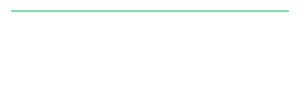

In [16]:
# now lets draw a line along the equator using shapely
equator = geom.LineString([(-180, 0), (180, 0)]) # longitude, latitude
equator # connect the points (-180, 0) and (180, 0)

In [17]:
# can just add the equator to the map
m.add_child(folium.GeoJson(equator, name = "Equator"))

In [18]:
# Lets plot the temperature data vs time for DNSO station
# get all rows for the station
dnso = cycle_data_df[cycle_data_df['station_id'] == 'DNSO']
dnso

,code,type,correction,mod,station_id,time,cycle,wind_dir,wind_speed,wind_gust,...,_remarks,_unparsed_groups,_unparsed_remarks,_now,_month,_year,_day,_hour,_min,geometry
60446,DNSO 060600Z 06005KT 8000 HZ NSC 24/07 Q1011,METAR,None,AUTO,DNSO,2024-03-06 06:00:00+00:00,6.0,60.0 degree,5.0,nan,...,[],[],[],2024-03-06 23:31:54.085178+00:00,3.0,2024.0,6.0,6.0,0.0,POINT (5.20200 12.91700)
69753,DNSO 060700Z 05003KT CAVOK 25/10 Q1011,METAR,None,AUTO,DNSO,2024-03-06 07:00:00+00:00,7.0,50.0 degree,3.0,nan,...,[],[],[],2024-03-06 23:31:51.833540+00:00,3.0,2024.0,6.0,7.0,0.0,POINT (5.20200 12.91700)
78194,DNSO 060800Z 09004KT 7000 NSC 30/08 Q1012,METAR,None,AUTO,DNSO,2024-03-06 08:00:00+00:00,8.0,90.0 degree,4.0,nan,...,[],[],[],2024-03-06 23:31:48.723016+00:00,3.0,2024.0,6.0,8.0,0.0,POINT (5.20200 12.91700)
87333,DNSO 060900Z 08006KT 7000 NSC 35/07 Q1013,METAR,None,AUTO,DNSO,2024-03-06 09:00:00+00:00,9.0,80.0 degree,6.0,nan,...,[],[],[],2024-03-06 23:31:53.465785+00:00,3.0,2024.0,6.0,9.0,0.0,POINT (5.20200 12.91700)
104323,DNSO 061100Z 17006KT 7000 NSC 41/08 Q1011,METAR,None,AUTO,DNSO,2024-03-06 11:00:00+00:00,11.0,170.0 degree,6.0,nan,...,[],[],[],2024-03-06 23:31:47.876422+00:00,3.0,2024.0,6.0,11.0,0.0,POINT (5.20200 12.91700)
113754,DNSO 061200Z 16005KT 8000 NSC 42/08 Q1011,METAR,None,AUTO,DNSO,2024-03-06 12:00:00+00:00,12.0,160.0 degree,5.0,nan,...,[],[],[],2024-03-06 23:31:52.806597+00:00,3.0,2024.0,6.0,12.0,0.0,POINT (5.20200 12.91700)
121459,DNSO 061300Z 03003KT 9000 NSC 42/09 Q1009,METAR,None,AUTO,DNSO,2024-03-06 13:00:00+00:00,13.0,30.0 degree,3.0,nan,...,[],[],[],2024-03-06 23:31:50.496142+00:00,3.0,2024.0,6.0,13.0,0.0,POINT (5.20200 12.91700)
131485,DNSO 061400Z 12006KT CAVOK 43/09 Q1008,METAR,None,AUTO,DNSO,2024-03-06 14:00:00+00:00,14.0,120.0 degree,6.0,nan,...,[],[],[],2024-03-06 23:31:47.878355+00:00,3.0,2024.0,6.0,14.0,0.0,POINT (5.20200 12.91700)
141817,DNSO 061500Z 03004KT CAVOK 43/11 Q1008,METAR,None,AUTO,DNSO,2024-03-06 15:00:00+00:00,15.0,30.0 degree,4.0,nan,...,[],[],[],2024-03-06 23:31:53.360460+00:00,3.0,2024.0,6.0,15.0,0.0,POINT (5.20200 12.91700)
152913,DNSO 061600Z 06003KT CAVOK 43/11 Q1008,METAR,None,AUTO,DNSO,2024-03-06 16:00:00+00:00,16.0,60.0 degree,3.0,nan,...,[],[],[],2024-03-06 23:31:51.867260+00:00,3.0,2024.0,6.0,16.0,0.0,POINT (5.20200 12.91700)


In [19]:
# plot the temperature vs time
dnso["temp"] = dnso["temp"].pint.magnitude

/home/john/Documents/fixing_metar/venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


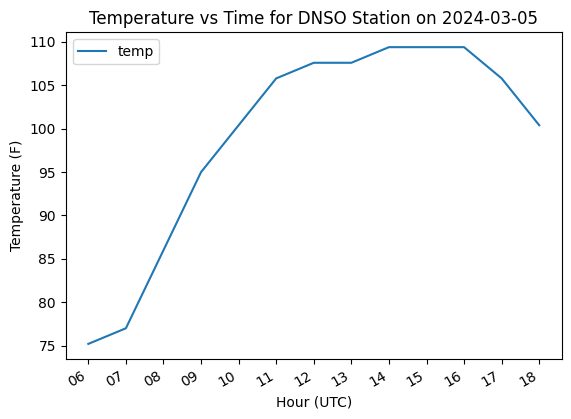

In [20]:
fig, ax = plt.subplots()
dnso.plot(x = "time", y = "temp", ax = ax, kind = "line")

# lets add a title and labels
ax.set_title(f"Temperature vs Time for DNSO Station on {start_time.date()}")
ax.set_xlabel("Hour (UTC)")
ax.set_ylabel("Temperature (F)")

# use matplotlib datetime formatters
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

In [21]:
# Shapes are REALLY powerful
# I downloaded a custom shapefile for the eclipse path
eclipse_path = gpd.read_file("eclipse.geojson")
eclipse_path

,Name,altitudeMode,tessellate,extrude,visibility,geometry
0,Northern Limit,clampToGround,1,0,1,"LINESTRING Z (-158.73180 -7.19006 0.00000, -15..."
1,Central Line,clampToGround,1,0,1,"LINESTRING Z (-158.52130 -7.82004 0.00000, -15..."
2,Southern Limit,clampToGround,1,0,1,"LINESTRING Z (-158.33509 -8.45031 0.00000, -15..."
3,Umbra,clampToGround,1,0,1,"POLYGON Z ((-158.52130 -7.82004 0.00000, -158...."


In [22]:
# we're interesteed in the umbra path
umbra = eclipse_path[eclipse_path["Name"] == "Umbra"]
# turn back into a geodataframe
umbra.iloc[0]


Name                                                        Umbra
altitudeMode                                        clampToGround
tessellate                                                      1
extrude                                                         0
visibility                                                      1
geometry        POLYGON Z ((-158.5213 -7.82004 0, -158.7318 -7...
Name: 3, dtype: object

In [23]:
# lets plot the umbra path on the map with folium
m = umbra.explore(name = "Eclipse Path", tooltip = False, color = "black", weight = 5, opacity = 0.5)
m

In [24]:
# now lets find all the stations that are in the umbra path
# get a station df (Note that im using the term df and gdf interchangeably. All the dfs we've been using are actually gdfs)
stations = cycle_data_df[["station_id", "geometry"]].drop_duplicates("station_id")
stations

,station_id,geometry
0,KACZ,POINT (-78.00500 34.71800)
1,KCBE,POINT (-78.75980 39.61820)
2,KCGE,POINT (-76.03090 38.53720)
3,KCTZ,POINT (-78.36270 34.97520)
4,KDMW,POINT (-77.00700 39.61000)
...,...,...
201221,NFNR,POINT (177.07100 -12.48300)
202719,RKNW,POINT (127.94700 37.33700)
203278,RKTI,POINT (127.88500 37.03000)
208544,PAFM,POINT (-157.85800 67.10600)


In [25]:
# now we can index the stations that are in the umbra path
stations_in_umbra = stations[stations.within(umbra.iloc[0].geometry)]
stations_in_umbra

,station_id,geometry
12,KMWA,POINT (-89.01180 37.75440)
47,KCGF,POINT (-81.48270 41.56600)
72,KBAK,POINT (-85.89260 39.26640)
83,KMVN,POINT (-88.85300 38.32840)
85,KLPR,POINT (-82.17880 41.34630)
...,...,...
16336,KSAR,POINT (-89.70250 38.14630)
78225,CYCX,POINT (-66.45000 45.83900)
94500,KADF,POINT (-93.06900 34.09530)
127592,MMMV,POINT (-101.47000 26.95600)


In [26]:
# now we can plot the stations in the umbra path
stations_in_umbra.explore(m=m, column="station_id", tooltip="station_id",
                          popup=True, 
                          marker_kwds={"radius": 5, "fill": True, "fillColor": "black", "color": "black", "colorbar": False},
                          legend=False, scheme="NaturalBreaks")
m

In [50]:
# could be really cool to plot the temperature data and estimate the traversal speed of the umbra path
# but we should see how often they report observations
# for each station, lets see how many observations they have
station_umbra_counts = cycle_data_df[cycle_data_df["station_id"].isin(stations_in_umbra["station_id"])].groupby("station_id").size().sort_values(ascending=False)
station_umbra_counts[:20]
# Erie is here

station_id
CYSC    118
CYFC    104
KMPV     87
KERI     76
KGKJ     75
KMVL     72
K8B0     71
KAXV     71
K5T9     71
K4O4     71
KFRH     71
KCCA     71
KCDA     71
KCFJ     71
KCPT     71
KCXW     71
K4M9     71
KSDC     71
KEDJ     71
KEFK     71
dtype: int64

In [53]:
# now show the top 20 stations on the map
m = stations_in_umbra[stations_in_umbra["station_id"].isin(station_umbra_counts[:20].index)].explore(column="station_id", tooltip="station_id",
                          popup=True, 
                          marker_kwds={"radius": 5, "fill": True, "fillColor": "black", "color": "black", "colorbar": False},
                          legend=False, scheme="NaturalBreaks")
m

<Axes: xlabel='time'>

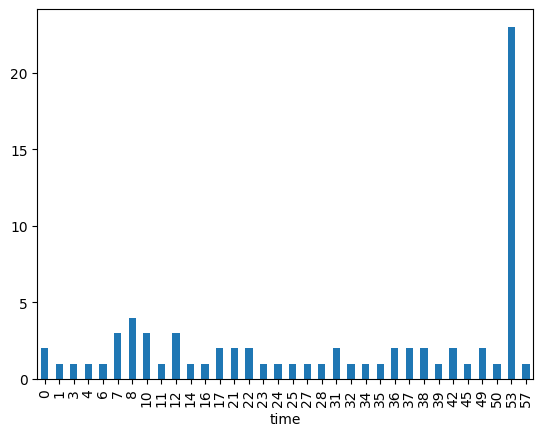

In [73]:
# lets see the distrubution of the minute count for Erie
erie = cycle_data_df[cycle_data_df["station_id"] == "KGKJ"]
erie["time"].dt.minute.value_counts().sort_index().plot(kind="bar")


<Axes: xlabel='time'>

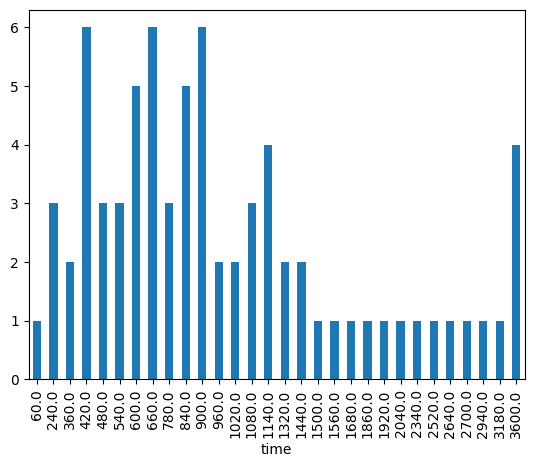

In [74]:
# distribution of time between observations might be more useful
erie["time"].diff().dt.seconds.value_counts().sort_index().plot(kind="bar")

In [28]:
# What about distances?
# For example, let's write a function that given a longitude and latitude, return the most recent observation from the closest station

# we'll regenerate the cycle data to get the most recent data
start_time = pd.Timestamp.now(tz='UTC') - pd.Timedelta('4 hours')
most_recent_cycle_data = await CycleData.create_instance(start_time, tz='UTC')
def get_closest_station(longitude, latitude, cycle_data):
    recent_df = cycle_data.dataframe
    # create a point
    point = geom.Point(longitude, latitude)
    
    # need to convert to a mercator projection
    point_gdf = gpd.GeoDataFrame(geometry = [point], crs = "EPSG:4326")
    point_gdf.to_crs("EPSG:3395", inplace = True)
    
    # find the closest station
    recent_df.to_crs("EPSG:3395", inplace = True)
    distances = recent_df.distance(point_gdf.iloc[0].geometry)
    closest_index = distances.nsmallest(1).index
    closest_station = recent_df.loc[closest_index]["station_id"].values[0]
    
    return recent_df[recent_df["station_id"] == closest_station].iloc[-1]

# # lets get the closest station to the SVC (-79.4010, 40.2934) (hopefully it's KLBE)
closest_and_recent = get_closest_station(-79.4010, 40.2934, most_recent_cycle_data)
closest_and_recent

Fetching cycles 19 to 23...
Cycle data has been fetched!
Processing 171582 METAR reports...
Data has been processed!


code                 KLBE 062320Z VRB04KT 10SM -RA SCT012 BKN047 BK...
type                                                             METAR
correction                                                        None
mod                                                               AUTO
station_id                                                        KLBE
time                                         2024-03-06 23:20:00+00:00
cycle                                                             23.0
wind_dir                                                           NaN
wind_speed                                                    4.0 knot
wind_gust                                                     nan knot
wind_dir_from                                                      NaN
wind_dir_to                                                        NaN
vis                                                                NaN
vis_dir                                                            NaN
max_vi

In [29]:
# I also implemented saving and loading the cycle data
# save the cycle data
most_recent_cycle_data.save_instance("most_recent_cycle_data.pkl")

In [30]:
# and load it
test_data = CycleData.load_instance("most_recent_cycle_data.pkl")

In [31]:
test_data.dataframe.head()

,code,type,correction,mod,station_id,time,cycle,wind_dir,wind_speed,wind_gust,...,_remarks,_unparsed_groups,_unparsed_remarks,_now,_month,_year,_day,_hour,_min,geometry
0,SBOI 061934Z AUTO 06005KT 030V100 6000 +RA FEW...,METAR,None,AUTO,SBOI,2024-03-06 19:34:00+00:00,19.0,60.0 degree,5.0,nan,...,[],[],[],2024-03-06 23:33:19.429572+00:00,3.0,2024.0,6.0,19.0,34.0,POINT (-5765904.345 427255.089)
1,KCSV 061934Z AUTO 36004KT 7SM SCT005 BKN015 OV...,METAR,None,AUTO,KCSV,2024-03-06 19:34:00+00:00,19.0,360.0 degree,4.0,nan,...,[Automated station (type 2)],[],[],2024-03-06 23:33:18.892012+00:00,3.0,2024.0,6.0,19.0,34.0,POINT (-9471218.124 4268794.322)
2,KAKQ 061934Z AUTO VRB04KT 10SM OVC007 14/12 A2...,METAR,None,AUTO,KAKQ,2024-03-06 19:34:00+00:00,19.0,NaN,4.0,nan,...,[Automated station (type 2)],[],"[CIG, 006V011]",2024-03-06 23:33:19.748010+00:00,3.0,2024.0,6.0,19.0,34.0,POINT (-8571756.638 4410989.088)
3,KDUB 061934Z AUTO 27021G29KT 10SM SCT055 01/M1...,METAR,None,AUTO,KDUB,2024-03-06 19:34:00+00:00,19.0,270.0 degree,21.0,29.0,...,[Automated station (type 2)],[],[],2024-03-06 23:33:18.918929+00:00,3.0,2024.0,6.0,19.0,34.0,POINT (-12209967.028 5366386.747)
4,NTAA 061934Z VRB03KT 9999 FEW020 SCT140 30/25 ...,METAR,None,AUTO,NTAA,2024-03-06 19:34:00+00:00,19.0,NaN,3.0,nan,...,[],[],[],2024-03-06 23:33:19.690077+00:00,3.0,2024.0,6.0,19.0,34.0,POINT (-16654175.059 -1972529.985)
